In [145]:
#import liabraries
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [146]:
#read data from csv
cltv = pd.read_csv('CLTV.csv')

In [147]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [148]:
cltv.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [149]:
cltv.shape

(89392, 12)

In [150]:
cltv.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [151]:
cltv.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [152]:
cltv['vintage'].min(),cltv['vintage'].max()

(0, 8)

We can coclude that the oldest costomer of company is in relation for 8 years.

# EDA

# Variable Identification

In [153]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [154]:
cltv.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

From above we can need to typecast some varibles as object form into categorical
like gender, area, marital_status, num_policies, policy, type_of_policy.

# Univariate Analysis

In [155]:
cltv['id']=cltv['id'].astype('object')
cltv['gender']=cltv['gender'].astype('category')
cltv['area']=cltv['area'].astype('category')
cltv['marital_status']=cltv['marital_status'].astype('category')
cltv['num_policies']=cltv['num_policies'].astype('category')
cltv['policy']=cltv['policy'].astype('category')
cltv['type_of_policy']=cltv['type_of_policy'].astype('category')
cltv['qualification']=cltv['qualification'].astype('category')

In [156]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [157]:
cltv.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [158]:
cltv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              89392 non-null  object  
 1   gender          89392 non-null  category
 2   area            89392 non-null  category
 3   qualification   89392 non-null  category
 4   income          89392 non-null  object  
 5   marital_status  89392 non-null  category
 6   vintage         89392 non-null  int64   
 7   claim_amount    89392 non-null  int64   
 8   num_policies    89392 non-null  category
 9   policy          89392 non-null  category
 10  type_of_policy  89392 non-null  category
 11  cltv            89392 non-null  int64   
dtypes: category(7), int64(3), object(2)
memory usage: 4.0+ MB


In [159]:
cltv.dtypes

id                  object
gender            category
area              category
qualification     category
income              object
marital_status    category
vintage              int64
claim_amount         int64
num_policies      category
policy            category
type_of_policy    category
cltv                 int64
dtype: object

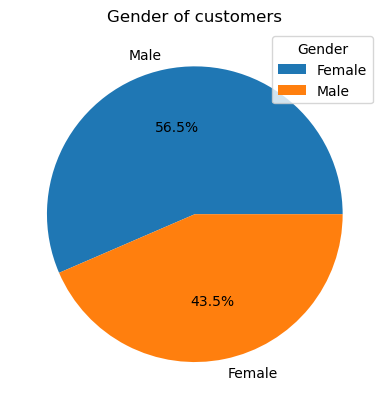

In [16]:
# Calculate the counts of each gender
gender_counts = cltv['gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("Gender of customers")
plt.legend(title="Gender", labels=['Female', 'Male'])

# Show the plot
plt.show()

This shows that Male costomers are slightly more than i.e. 56.5%

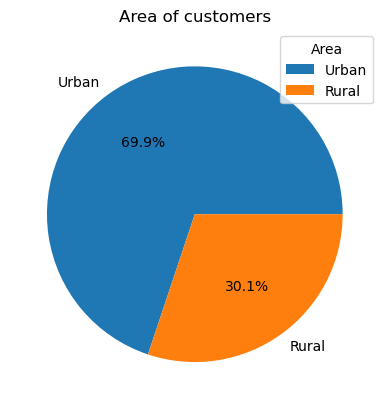

In [90]:
# Calculate the counts of each area
area_counts = cltv['area'].value_counts()

# Create a pie chart
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("Area of customers")
plt.legend(title="Area", labels=['Urban', 'Rural'])

# Show the plot
plt.show()

This shows that the company has got More costomers in Urban area i.e.69.9%

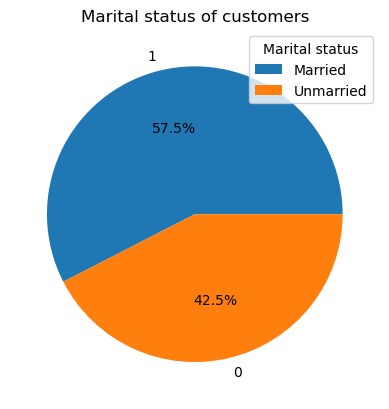

In [92]:
# Calculate the counts of each marital status
marital_status_counts = cltv['marital_status'].value_counts()

# Create a pie chart
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("Marital status of customers")
plt.legend(title="Marital status", labels=['Married', 'Unmarried'])

# Show the plot
plt.show()

This chart shows that the company has more number of married costomers i.e. 57.5%

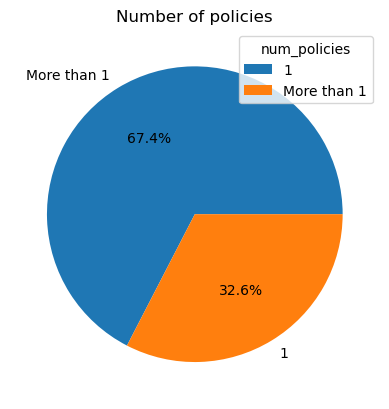

In [94]:
# Calculate the counts of each num policies
num_policies_counts = cltv['num_policies'].value_counts()

# Create a pie chart
plt.pie(num_policies_counts, labels=num_policies_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("Number of policies")
plt.legend(title="num_policies", labels=['1', 'More than 1'])

# Show the plot
plt.show()

This shows that the company has got More costomers with more than 1 policies i.e. 67.4%

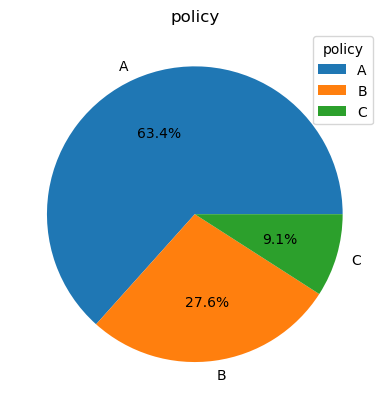

In [93]:
# Calculate the counts of each policy
policy_counts = cltv['policy'].value_counts()

# Create a pie chart
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("policy")
plt.legend(title="policy", labels=['A', 'B', 'C'])

# Show the plot
plt.show()

This shows that the company has got More costomers with A policy 63.4%, followed by B policy 27.6%, followed by C policy 9.1%

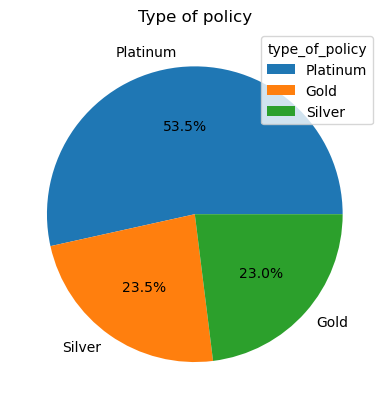

In [89]:
# Calculate the counts of each type_of_policy
type_of_policy_counts = cltv['type_of_policy'].value_counts()

# Create a pie chart
plt.pie(type_of_policy_counts, labels=type_of_policy_counts.index, autopct='%1.1f%%')

# Add title and legend
plt.title("Type of policy")
plt.legend(title="type_of_policy", labels=['Platinum', 'Gold', 'Silver'])

# Show the plot
plt.show()

This shows that the company has got More costomers with Platinum policy 53.5%, followed by Silver  policy 23.5%, followed by Gold policy 23.0%

# Bivariate Analysis

In [23]:
cltv.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [26]:
cltv.isnull().sum() 

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

There is No Null Value in data.

C:\Users\Ap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


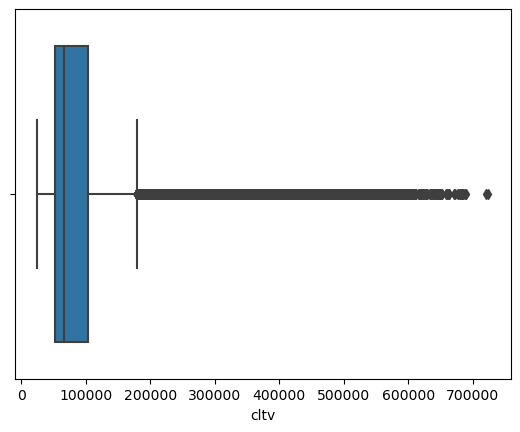

In [27]:
sns.boxplot(cltv['cltv'])
plt.show()

There are some Actual outliers in data

# Start Label encoding and find corelation between variables

In [30]:
cltv2=cltv.copy()

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
cltv2['gender']=le.fit_transform(cltv2['gender'])

In [33]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [34]:
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)

{'Female': 0, 'Male': 1}


In [35]:
cltv2['area']=le.fit_transform(cltv2['area'])

In [36]:
le.classes_

array(['Rural', 'Urban'], dtype=object)

In [37]:
area_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(area_labels)

{'Rural': 0, 'Urban': 1}


In [38]:
cltv2['income']=le.fit_transform(cltv2['income'])

In [39]:
le.classes_

array(['2L-5L', '5L-10L', '<=2L', 'More than 10L'], dtype=object)

In [40]:
income_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(income_labels)

{'2L-5L': 0, '5L-10L': 1, '<=2L': 2, 'More than 10L': 3}


In [41]:
cltv2['num_policies']=le.fit_transform(cltv2['num_policies'])

In [42]:
le.classes_

array(['1', 'More than 1'], dtype=object)

In [43]:
num_policies_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(num_policies_labels)

{'1': 0, 'More than 1': 1}


In [44]:
cltv2['type_of_policy']=le.fit_transform(cltv2['type_of_policy'])

In [45]:
le.classes_

array(['Gold', 'Platinum', 'Silver'], dtype=object)

In [46]:
types_of_policies_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(types_of_policies_labels)

{'Gold': 0, 'Platinum': 1, 'Silver': 2}


In [47]:
cltv2['qualification']=le.fit_transform(cltv2['qualification'])

In [48]:
le.classes_

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [49]:
qualification_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(qualification_labels)

{'Bachelor': 0, 'High School': 1, 'Others': 2}


In [50]:
cltv2['marital_status']=le.fit_transform(cltv2['marital_status'])

In [51]:
le.classes_

array([0, 1], dtype=int64)

In [52]:
marital_status_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(marital_status_labels)

{0: 0, 1: 1}


In [53]:
cltv2['policy']=le.fit_transform(cltv2['policy'])

In [54]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [55]:
policy_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(policy_labels)

{'A': 0, 'B': 1, 'C': 2}


In [56]:
cltv2

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0,1,1,1,95736
89388,89389,1,1,0,1,1,0,3897,1,0,1,67596
89389,89390,0,1,0,1,0,4,3363,1,1,1,114120
89390,89391,0,0,1,0,0,8,0,1,1,1,71772


In [58]:
cltv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  object
 1   gender          89392 non-null  int32 
 2   area            89392 non-null  int32 
 3   qualification   89392 non-null  int32 
 4   income          89392 non-null  int32 
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  int32 
 9   policy          89392 non-null  int32 
 10  type_of_policy  89392 non-null  int32 
 11  cltv            89392 non-null  int64 
dtypes: int32(7), int64(4), object(1)
memory usage: 5.8+ MB


In [59]:
cltv2.drop(['id'],axis=1,inplace=True)

<AxesSubplot:>

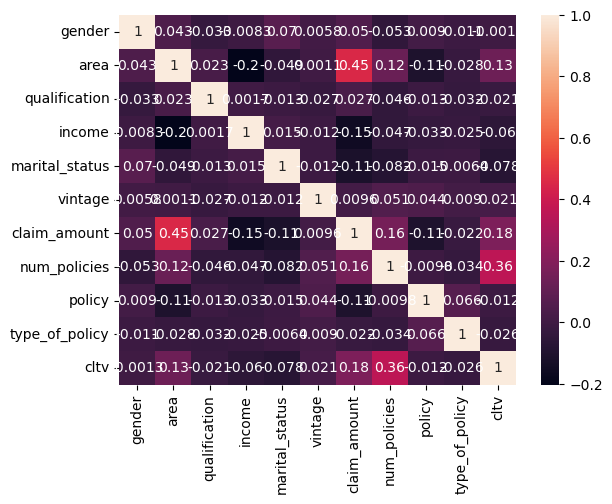

In [60]:
sns.heatmap(cltv2.corr(),annot=True)

 Claim amount is showing greater co- relation with cltv

In [133]:
cltv2['claim_amount1']= cltv2['claim_amount'].apply(lambda x:1 if x==0 else x)

In [134]:
cltv2['log_claim']=np.log(cltv2['claim_amount1'])

In [135]:
cltv2.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,log_claim,claim_amount1
0,1,1,0,1,1,5,5790,1,0,1,64308,8.663888,5790
1,1,0,1,1,0,8,5080,1,0,1,515400,8.533067,5080
2,1,1,0,1,1,8,2599,1,0,1,64212,7.862882,2599
3,0,0,1,1,0,7,0,1,0,1,97920,0.000000,1
4,1,1,1,3,1,6,3508,1,0,0,59736,8.162801,3508


C:\Users\Ap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_claim'>

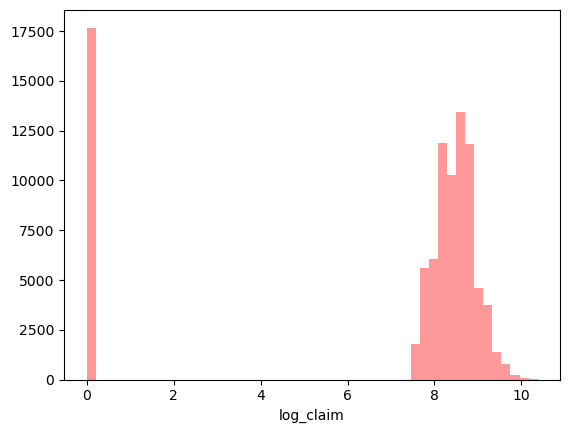

In [136]:
sns.distplot(cltv2['log_claim'], kde = False, color ='red')

C:\Users\Ap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vintage'>

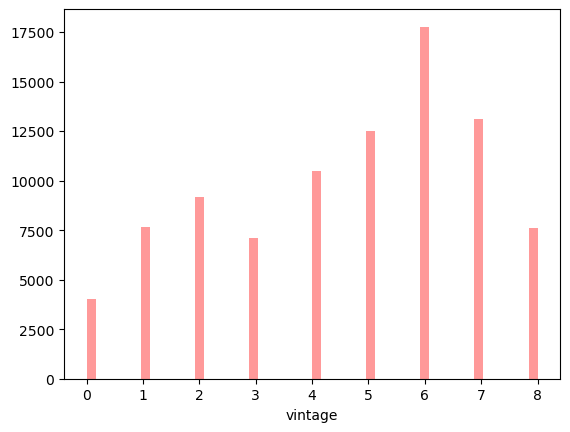

In [61]:
sns.distplot(cltv2['vintage'], kde = False, color ='red')

<AxesSubplot:xlabel='claim_amount'>

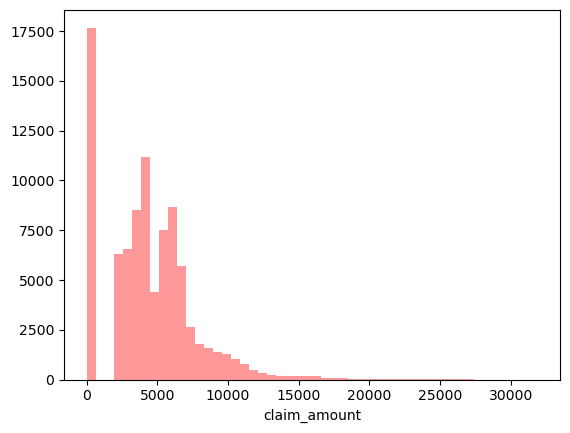

In [62]:
sns.distplot(cltv2['claim_amount'], kde = False, color ='red')

<AxesSubplot:xlabel='income'>

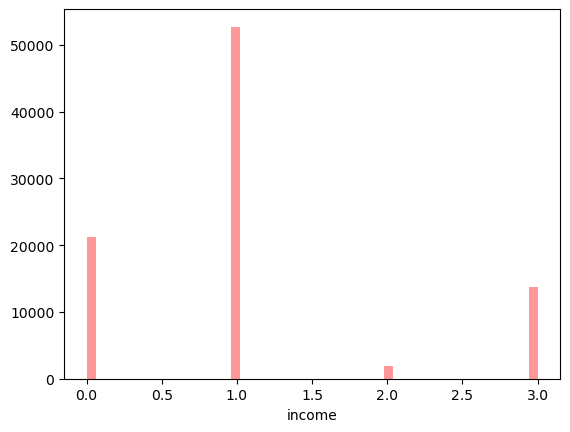

In [63]:
sns.distplot(cltv2['income'], kde = False, color ='red')

<AxesSubplot:xlabel='gender'>

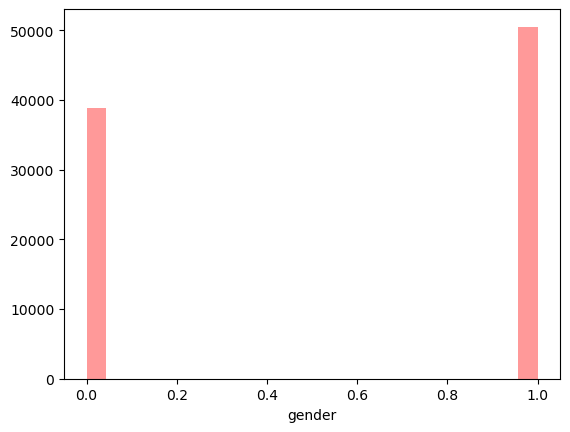

In [64]:
sns.distplot(cltv2['gender'], kde = False, color ='red')

<AxesSubplot:xlabel='area'>

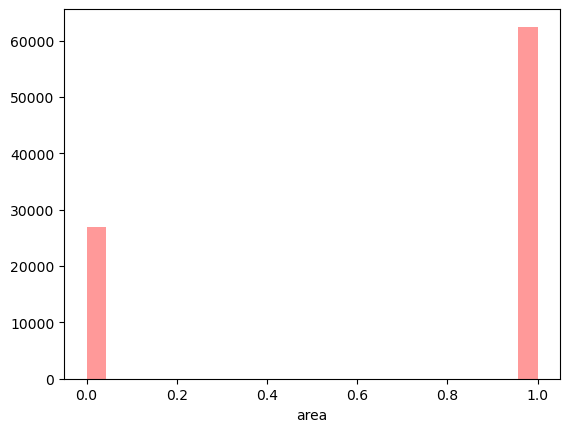

In [65]:
sns.distplot(cltv2['area'], kde = False, color ='red')

<AxesSubplot:xlabel='qualification'>

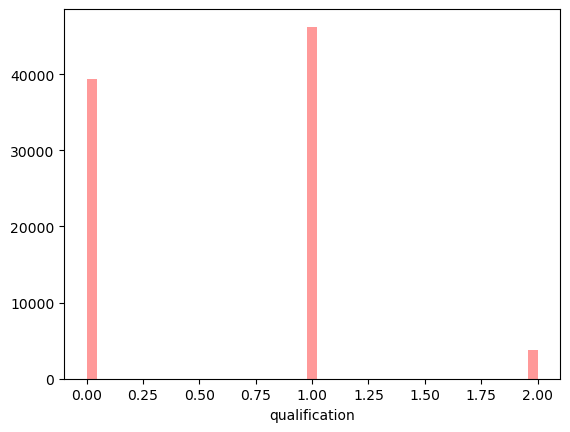

In [66]:
sns.distplot(cltv2['qualification'], kde = False, color ='red')

<AxesSubplot:xlabel='marital_status'>

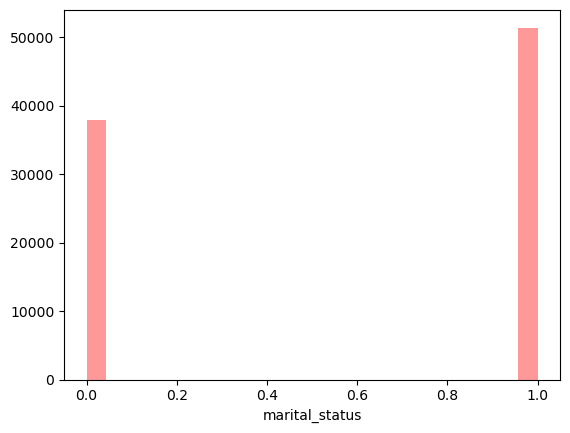

In [67]:
sns.distplot(cltv2['marital_status'], kde = False, color ='red')

<AxesSubplot:xlabel='num_policies'>

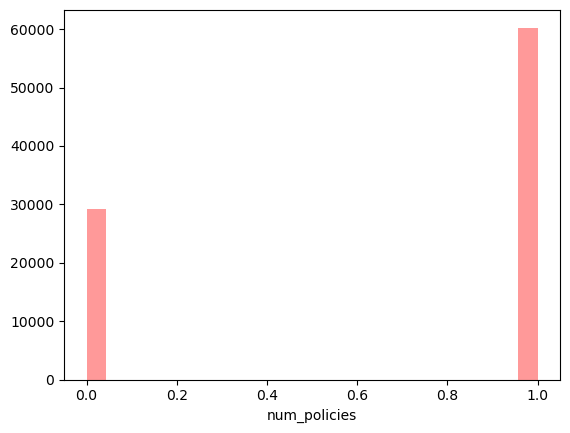

In [68]:
sns.distplot(cltv2['num_policies'], kde = False, color ='red')

<AxesSubplot:xlabel='policy'>

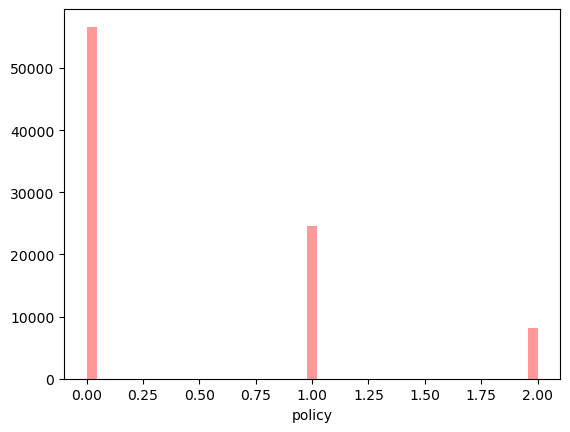

In [69]:
sns.distplot(cltv2['policy'], kde = False, color ='red')

<AxesSubplot:xlabel='type_of_policy'>

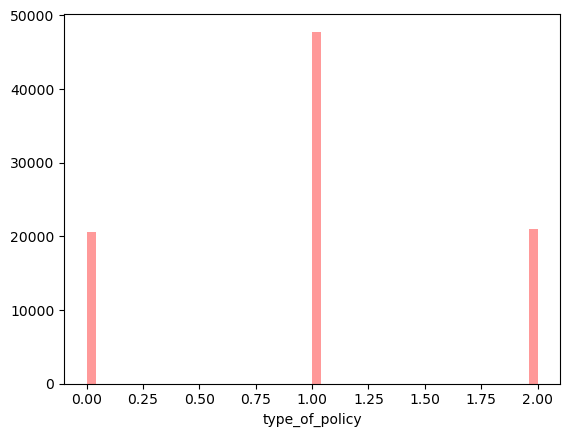

In [70]:
sns.distplot(cltv2['type_of_policy'], kde = False, color ='red')

<AxesSubplot:xlabel='cltv'>

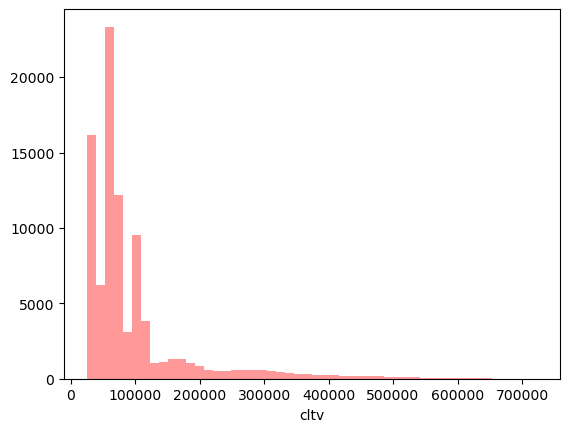

In [71]:
sns.distplot(cltv2['cltv'], kde = False, color ='red')

In [103]:
x=cltv2.drop(['cltv'],axis=1)
y=cltv2['cltv']
x.shape,y.shape

((89392, 10), (89392,))

In [104]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59)

In [105]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Linear Regression

In [106]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [115]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_predict,train_y))
print(r2_score(train_predict,train_y))
print(f"training error is {rmse}")

Training mean absolute error  51454.466558250984
-4.712053031506357
training error is 83618.24966070996


In [120]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_predict,test_y))
print(r2_score(test_predict,test_y))
print(f"testing error is {rmse}")

Test mean absolute error  51426.620412216944
-4.704407680965692
testing error is 83460.9684144458


In [111]:
lr.coef_

array([ 1.52849503e+03,  7.72523557e+03, -1.78350536e+03, -1.72250670e+03,
       -7.06204800e+03,  2.05275863e+02,  2.96818873e+00,  6.43717700e+04,
        6.74611574e+02, -1.52713904e+03])

Text(0.5, 1.0, 'Coefficient plot')

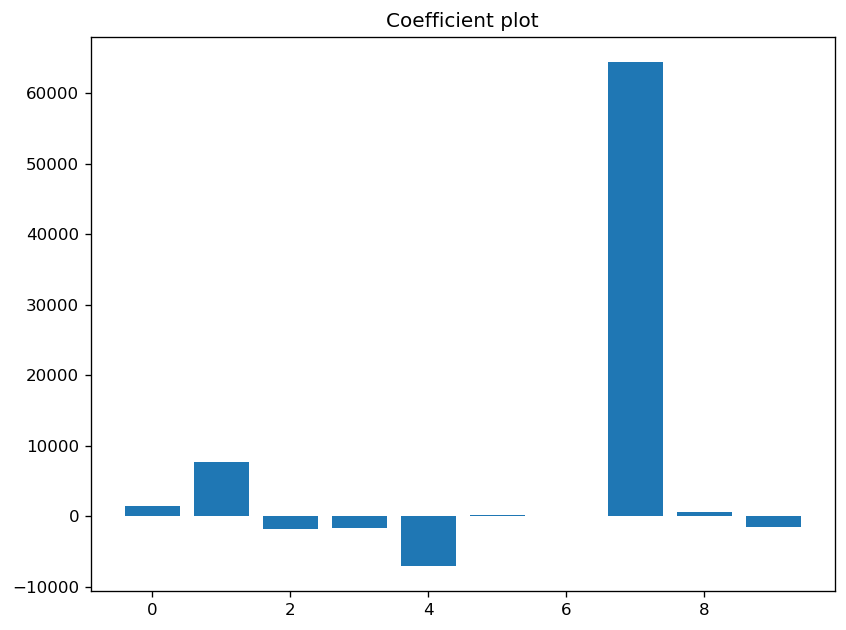

In [112]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel=('variables')
plt.ylabel=('Coefficients')
plt.title('Coefficient plot')

# Decision Tree Regressor

In [121]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [122]:
train_predict=regressor.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  4643.301208296616
0.9464842009991914
training error is 20968.803675948046


In [123]:
test_predict=regressor.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  67630.8469661715
-0.7023879234557959
testing error is 118112.49794735877


# Random forest regression

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [127]:
train_predict=rf.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  23104.984005860337
0.8228403828821869
training error is 38151.798272897926


In [128]:
test_predict=rf.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  55304.56932601471
0.04503493400141512
testing error is 88462.72881183858


In [137]:
cltv3=cltv2.drop(['claim_amount', 'claim_amount1'], axis=1)

In [138]:
cltv3.head()

,gender,area,qualification,income,marital_status,vintage,num_policies,policy,type_of_policy,cltv,log_claim
0,1,1,0,1,1,5,1,0,1,64308,8.663888
1,1,0,1,1,0,8,1,0,1,515400,8.533067
2,1,1,0,1,1,8,1,0,1,64212,7.862882
3,0,0,1,1,0,7,1,0,1,97920,0.000000
4,1,1,1,3,1,6,1,0,0,59736,8.162801


In [139]:
x=cltv3.drop(['cltv'],axis=1)
y=cltv3['cltv']
x.shape,y.shape

((89392, 10), (89392,))

In [140]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59)

In [141]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [142]:
train_predict=rf.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  23111.441333297884
0.8228412449360726
training error is 38151.70544997787


In [143]:
test_predict=rf.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  55304.47743546522
0.04533632253996811
testing error is 88448.76821922128


In [144]:
rf.feature_importances_

array([0.03505657, 0.00857159, 0.04766523, 0.05119787, 0.01857813,
       0.12200414, 0.13471281, 0.01965158, 0.05918957, 0.50337252])

# In linear Regression r2_score value is negative

# When we used DT Regressor and Random Forest we are getting less trainning errors and more testing errors.